In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
df = pd.read_csv('salaries.csv')
df = df.drop(columns=['salary','salary_currency'])
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
133344,2020,SE,FT,Data Scientist,412000,US,100,US,L
133345,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
133346,2020,EN,FT,Data Scientist,105000,US,100,US,S
133347,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


#Country with the most employees

In [269]:
country_employe = df.groupby('employee_residence')['employee_residence'].count().sort_values(ascending=False)
country_employe

employee_residence
US    119579
CA      5238
GB      3711
AU       517
NL       404
       ...  
OM         1
RW         1
QA         1
UG         1
ZM         1
Name: employee_residence, Length: 102, dtype: int64

#General Salaries

In [275]:
max_salary=df['salary_in_usd'].idxmax()
max_salary_row = df.loc[max_salary]
min_salary=df['salary_in_usd'].idxmin()
min_salary_row = df.loc[min_salary]

salary=pd.DataFrame({'Max Salary': max_salary_row, 'Min Salary': min_salary_row})
salary

,Max Salary,Min Salary
work_year,2025,2022
experience_level,SE,MI
employment_type,FT,FT
job_title,Architect,Business Intelligence Developer
salary_in_usd,800000,15000
employee_residence,US,GH
remote_ratio,0,100
company_location,US,GH
company_size,M,M


In [270]:
describe_salary = df['salary_in_usd'].describe()
describe_salary

count    133349.000000
mean     157617.272098
std       74288.363097
min       15000.000000
25%      106000.000000
50%      146206.000000
75%      198000.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

In [271]:
print("The maximum salary is:", describe_salary['max'])
print("The average salary is:", describe_salary['mean'])
print("The minimum salary is:", describe_salary['min'])


The maximum salary is: 800000.0
The average salary is: 157617.27209802848
The minimum salary is: 15000.0


#Job with the most employees

In [272]:
sum_job = df.groupby('job_title')['job_title'].count().sort_values(ascending=False)
sum_job

job_title
Data Scientist                     17314
Software Engineer                  15007
Data Engineer                      14868
Data Analyst                       12381
Engineer                            9456
                                   ...  
Big Data Analyst                       1
Advanced Data Analyst                  1
AWS Data Architect                     1
Analytics Analyst                      1
Staff Machine Learning Engineer        1
Name: job_title, Length: 390, dtype: int64

#Salary by experience level

In [273]:
levels = ['EN','MI','SE','EX']
for level in levels:
    ex = df[df['experience_level']==level]
    print(f"Experience Level: {level}")
    print(ex['salary_in_usd'].describe())

Experience Level: EN
count     12443.000000
mean      99039.040264
std       55548.169071
min       15000.000000
25%       62087.500000
50%       86551.000000
75%      124000.000000
max      793136.000000
Name: salary_in_usd, dtype: float64
Experience Level: MI
count     40465.000000
mean     143041.323489
std       72480.516555
min       15000.000000
25%       93500.000000
50%      130000.000000
75%      176000.000000
max      800000.000000
Name: salary_in_usd, dtype: float64
Experience Level: SE
count     77241.000000
mean     172850.003845
std       71013.562585
min       15645.000000
25%      123000.000000
50%      161154.000000
75%      210000.000000
max      800000.000000
Name: salary_in_usd, dtype: float64
Experience Level: EX
count      3200.000000
mean     202027.667813
std       78883.930639
min       15000.000000
25%      145440.000000
50%      190000.000000
75%      250000.000000
max      625000.000000
Name: salary_in_usd, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22996\734798160.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(


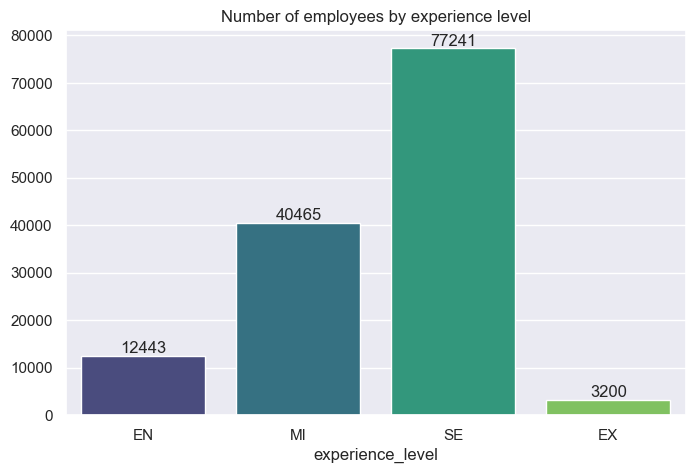

In [274]:
sum_experience = df.groupby('experience_level')['experience_level'].count()
orden = ['EN', 'MI', 'SE', 'EX'] 

plt.figure(figsize=(8, 5))
grafico = sns.barplot(
    x=sum_experience.index, 
    y=sum_experience.values, 
    palette='viridis',
    order=orden
)

for barra in grafico.patches:
    altura = barra.get_height()
    grafico.text(
        barra.get_x() + barra.get_width() / 2, 
        altura,                                 
        f'{altura:.0f}',                        
        ha='center', va='bottom'                
    )

plt.title('Number of employees by experience level')
plt.show()

In [277]:
def center_labels_v(grafico):
    for barra in grafico.patches:
        altura = barra.get_height()
        grafico.text(
            barra.get_x() + barra.get_width() / 2, 
            altura,                                 
            f'{altura:.0f}',                        
            ha='center', va='bottom'                
        )

def center_labels_h(grafico):
    for barra in grafico.patches:
        ancho = barra.get_width()
        grafico.text(
            ancho, 
            barra.get_y() + barra.get_height() / 2, 
            f'{ancho:.0f}', 
            ha='left', va='center'
        )
        

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22996\3118076814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico=sns.barplot(x=mean_salary_experience.index, y=mean_salary_experience.values, palette='coolwarm',


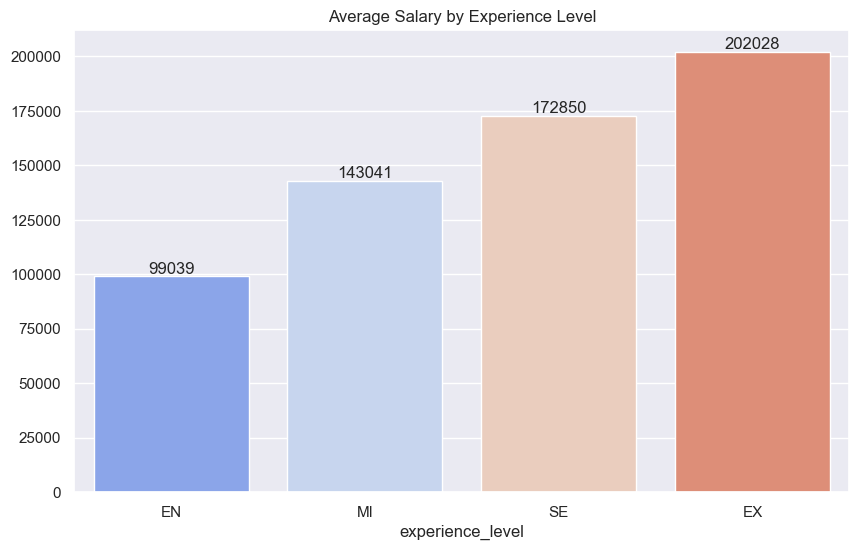

In [278]:
mean_salary_experience = df.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize=(10, 6)) 
grafico=sns.barplot(x=mean_salary_experience.index, y=mean_salary_experience.values, palette='coolwarm',
                    order=orden)
center_lebel_v(grafico)

plt.title('Average Salary by Experience Level')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22996\1043076854.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2', order=orden)


Text(0.5, 1.0, 'Salary Distribution by Experience Level')

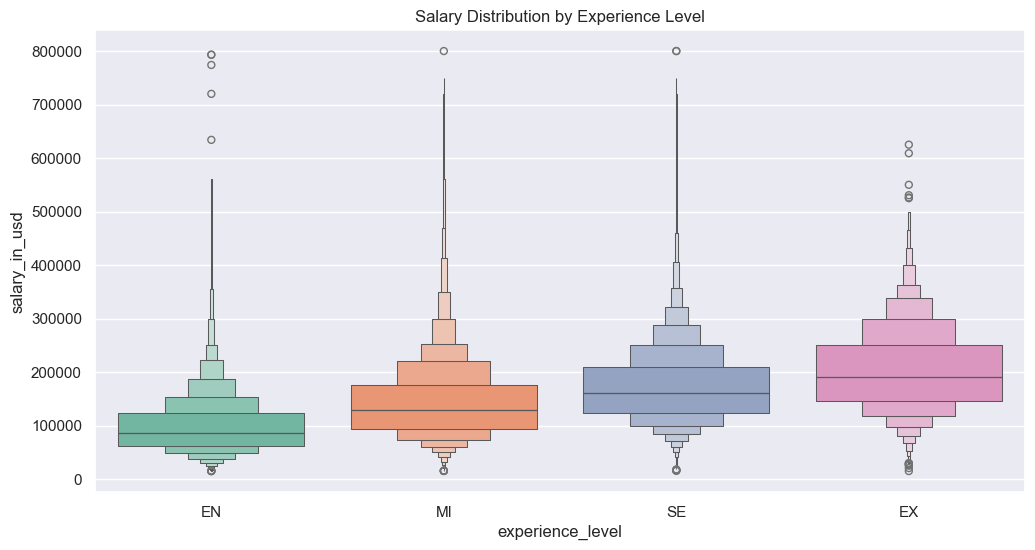

In [283]:
sns.boxenplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2', order=orden)
plt.title('Salary Distribution by Experience Level')

#Salary by job title

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22996\2156039147.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  grafico=sns.barplot(y=mean_salary_job.index, x=mean_salary_job.values, palette='mako',orient='horizontal')


Text(0.5, 1.0, 'Top 10 job titles with highest average salary')

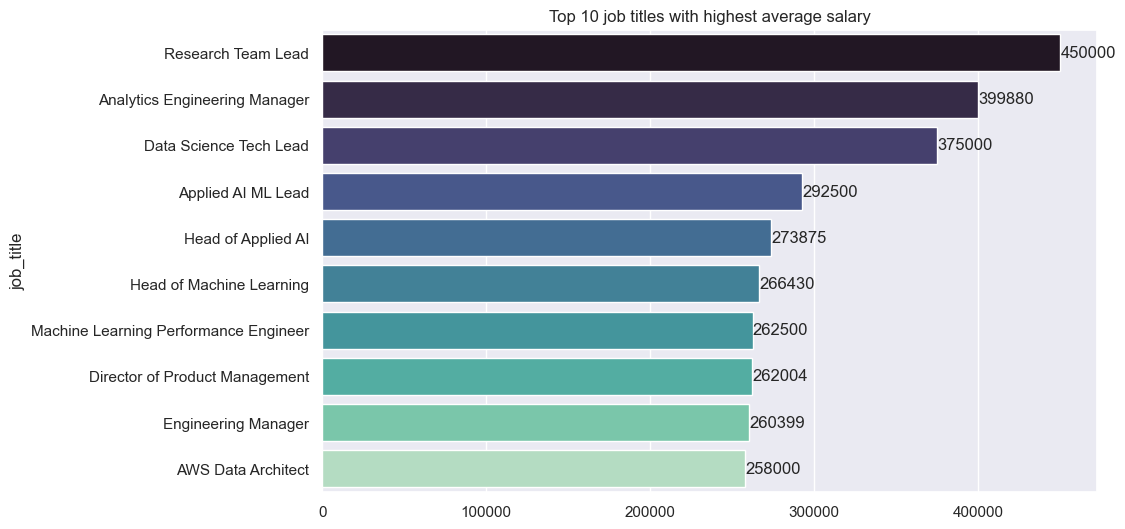

In [279]:
mean_salary_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
mean_salary_job = mean_salary_job.head(10)
plt.figure(figsize=(10, 6))
grafico=sns.barplot(y=mean_salary_job.index, x=mean_salary_job.values, palette='mako',orient='horizontal')
center_labels_h(grafico)
plt.title('Top 10 job titles with highest average salary')


#jobs by year

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22996\3430261563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(x=sum_work.index, y=sum_work.values, palette='magma')


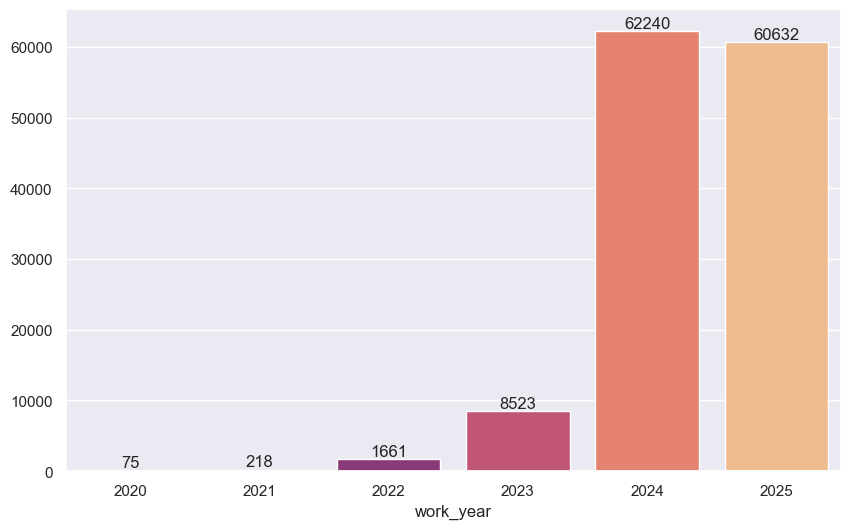

In [281]:
sum_work = df.groupby('work_year')['work_year'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
grafico = sns.barplot(x=sum_work.index, y=sum_work.values, palette='magma')
center_labels_v(grafico)

Text(0.5, 1.0, 'Salary vs Work Year by Experience Level')

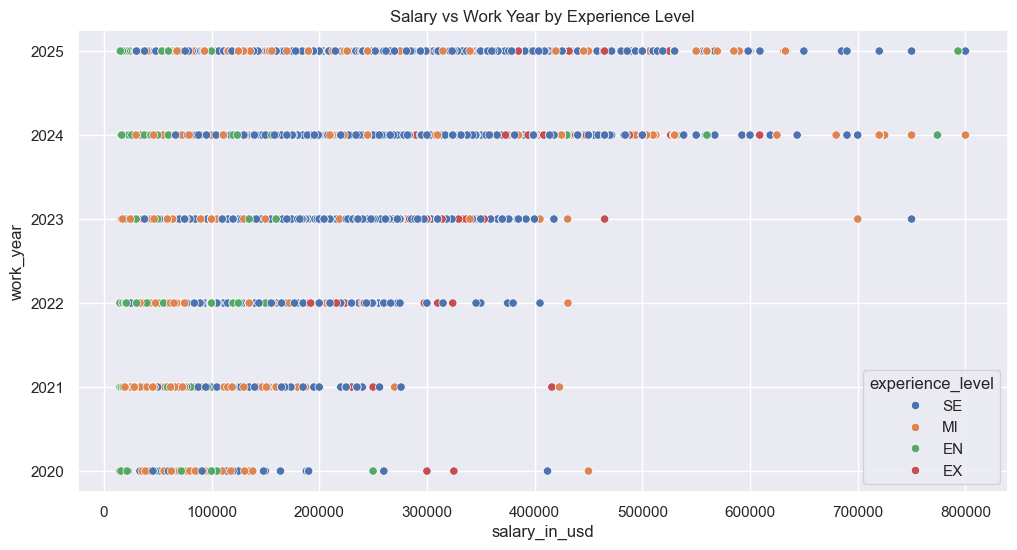

In [ ]:
sns.scatterplot(data=df,x='salary_in_usd', y='work_year', hue='experience_level')
plt.title('Salary vs Work Year by Experience Level')